In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("w10q1.csv")
df

,Points,Assists,Rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14
5,20.0,8.0,13
6,28.0,7.0,9
7,30.0,6.0,5
8,31.0,9.0,4
9,35.0,12.0,11


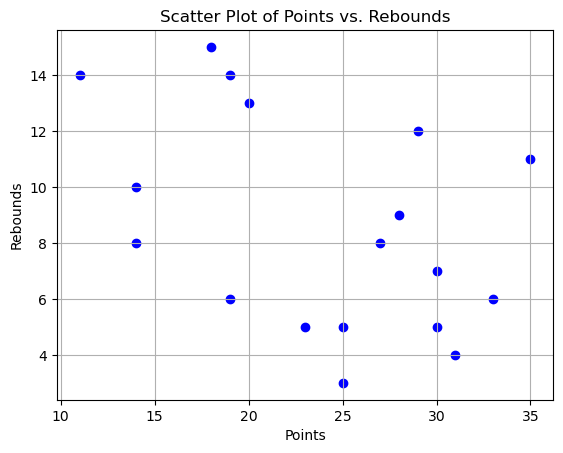

In [19]:
plt.scatter(df['Points'], df['Rebounds'], color='blue')
plt.title('Scatter Plot of Points vs. Rebounds')
plt.xlabel('Points')
plt.ylabel('Rebounds')
plt.grid()
plt.show()

In [20]:
def calculate_distances(data, centroids, metric):
    n = data.shape[0]
    k = centroids.shape[0]
    distances = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            if metric == 'euclidean':
                distances[i, j] = np.sqrt(np.sum((data.iloc[i] - centroids[j]) ** 2))
            elif metric == 'manhattan':
                distances[i, j] = np.sum(np.abs(data.iloc[i] - centroids[j]))
            elif metric == 'minkowski':
                p = 3
                distances[i, j] = (np.sum(np.abs(data.iloc[i] - centroids[j]) ** p)) ** (1/p)    
    return distances

In [21]:
def kmeans_clustering(data, k, distance_metric):
    centroids = data.sample(n=k).to_numpy()
    prev_centroids = np.zeros(centroids.shape)
    clusters = np.zeros(data.shape[0])
    sse = []

    while not np.array_equal(centroids, prev_centroids):
        prev_centroids = centroids.copy()
        distances = calculate_distances(data, centroids, metric=distance_metric)
        clusters = np.argmin(distances, axis=1)
        centroids = np.array([data.to_numpy()[clusters == j].mean(axis=0) for j in range(k)])
        current_sse = np.sum((data.to_numpy() - centroids[clusters]) ** 2)
        sse.append(current_sse)

    return clusters, centroids, sse

In [22]:
def calculate_sse(data, clusters, centroids):
    sse = 0
    for i in range(len(centroids)):
        cluster_data = data.to_numpy()[clusters == i]
        sse += np.sum((cluster_data - centroids[i]) ** 2)
    return sse

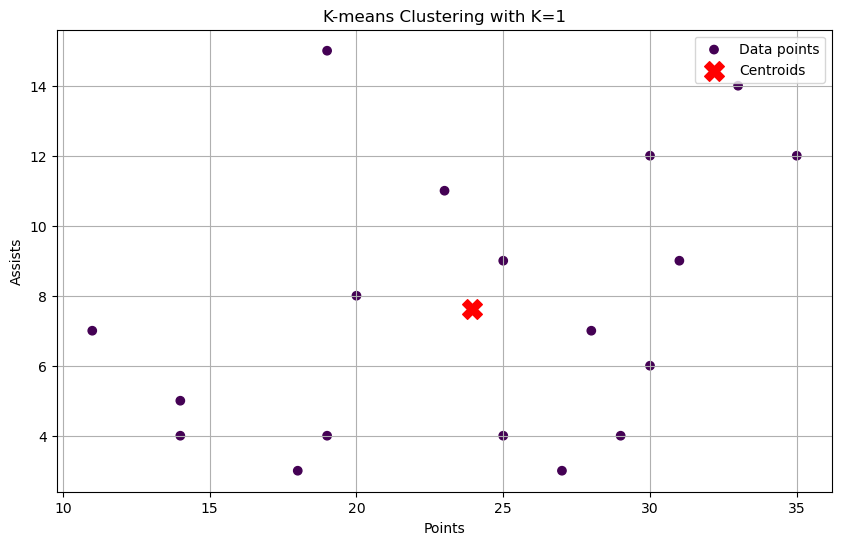

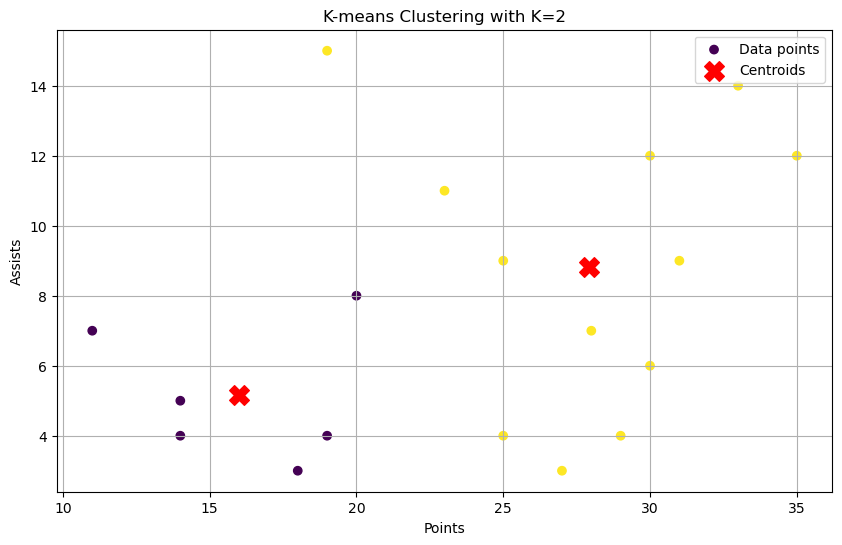

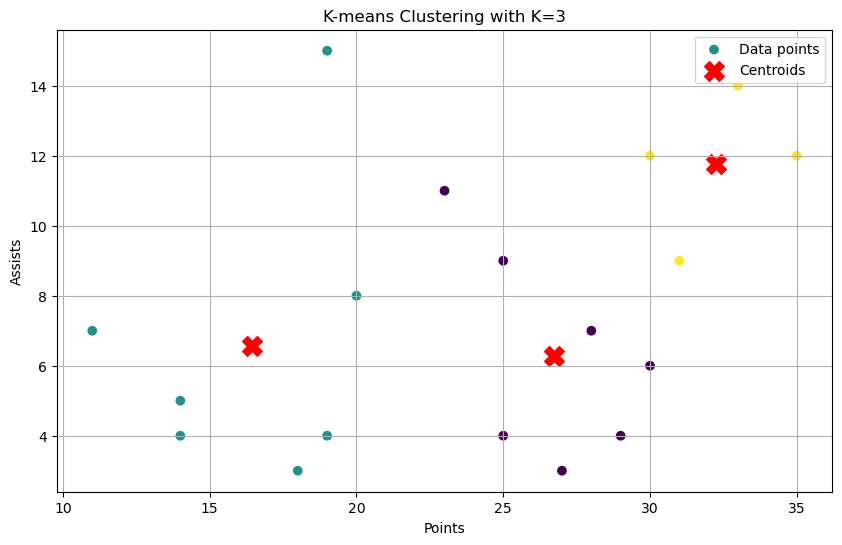

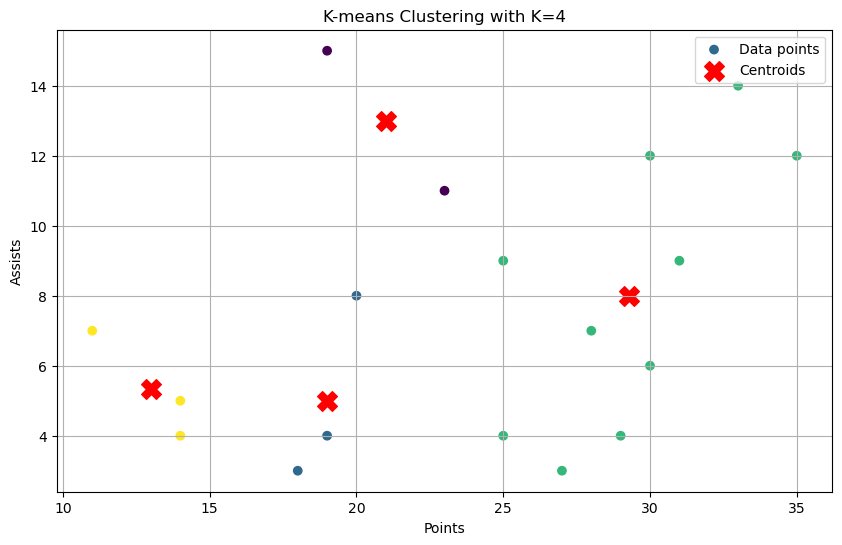

In [23]:
k_values = [1, 2, 3, 4]
sse_list = []
for k in k_values:
    clusters, centroids ,sse= kmeans_clustering(df, k, distance_metric='minkowski')
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Points'], df['Assists'], c=clusters, cmap='viridis', label='Data points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Clustering with K={k}')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.legend()
    plt.grid()
    plt.show()
    
    total_sse = np.sum(sse)
    sse_list.append(total_sse)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


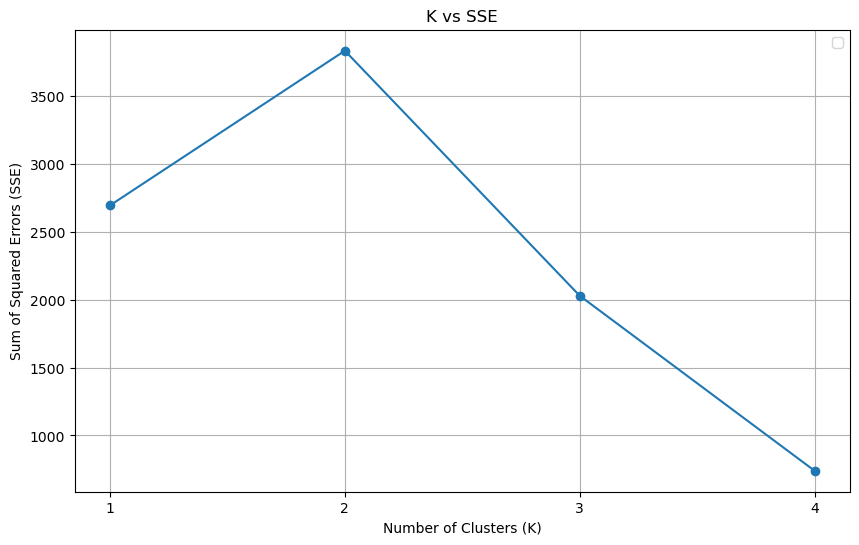

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_list, marker='o')
plt.title('K vs SSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()    

In [71]:
optimal_k = k_values[np.argmin(np.diff(sse_list, 2)) + 1]
print("Optimal value of k : ",optimal_k)

Optimal value of k :  3
